<a href="https://colab.research.google.com/github/jabir-al-nahian/credit-card-analysis-ml/blob/main/credit_card_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
dataFrame = pd.concat(
   map(pd.read_csv, ['/content/data1.csv', '/content/data2.csv']), ignore_index=True)

In [ ]:
dataFrame.head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Colmun 001,PaymentMethod,MonthlyCharges,TotalCharges,ID_Number,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,tenure,Output
0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
dataFrame['Output']= le.fit_transform(dataFrame['Output'])
dataFrame.head(5)

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Colmun 001,PaymentMethod,MonthlyCharges,TotalCharges,ID_Number,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,tenure,Output
0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
dataFrame['MultipleLines']= le.fit_transform(dataFrame['MultipleLines'])
dataFrame['InternetService']= le.fit_transform(dataFrame['InternetService'])
dataFrame['OnlineBackup']= le.fit_transform(dataFrame['OnlineBackup'])
dataFrame['DeviceProtection']= le.fit_transform(dataFrame['DeviceProtection'])
dataFrame['TechSupport']= le.fit_transform(dataFrame['TechSupport'])
dataFrame['StreamingTV']= le.fit_transform(dataFrame['StreamingTV'])
dataFrame['StreamingMovies']= le.fit_transform(dataFrame['StreamingMovies'])
dataFrame['Contract']= le.fit_transform(dataFrame['Contract'])
dataFrame['Colmun 001']= le.fit_transform(dataFrame['Colmun 001'])
dataFrame['PaymentMethod']= le.fit_transform(dataFrame['PaymentMethod'])
dataFrame['MonthlyCharges']= le.fit_transform(dataFrame['MonthlyCharges'])
dataFrame['TotalCharges']= le.fit_transform(dataFrame['TotalCharges'])
dataFrame['ID_Number']= le.fit_transform(dataFrame['ID_Number'])
dataFrame['customerID']= le.fit_transform(dataFrame['customerID'])
dataFrame['gender']= le.fit_transform(dataFrame['gender'])
dataFrame['Partner']= le.fit_transform(dataFrame['Partner'])
dataFrame['Dependents']= le.fit_transform(dataFrame['Dependents'])
dataFrame['PhoneService']= le.fit_transform(dataFrame['PhoneService'])
dataFrame['tenure']= le.fit_transform(dataFrame['tenure'])
dataFrame['OnlineSecurity']= le.fit_transform(dataFrame['OnlineSecurity'])
dataFrame['SeniorCitizen']= le.fit_transform(dataFrame['SeniorCitizen'])

In [ ]:
dataFrame.head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Colmun 001,PaymentMethod,MonthlyCharges,TotalCharges,ID_Number,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,tenure,Output
0,2,2,1,1,1,1,1,1,2,0,1,71,1066,5986,5986,2,2,2,2,2,73,2
1,0,1,0,2,2,0,2,0,0,1,1,1016,2901,5986,5986,2,2,2,2,2,73,2
2,2,1,0,0,0,0,0,0,0,1,0,772,2126,5986,5986,2,2,2,2,2,73,2
3,0,0,0,0,0,0,0,2,0,1,2,455,1733,5986,5986,2,2,2,2,2,73,2
4,0,0,2,0,2,0,0,0,0,0,2,407,308,5986,5986,2,2,2,2,2,73,2


In [ ]:
scaler.fit(dataFrame.drop('Output',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(dataFrame.drop('Output',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Colmun 001,PaymentMethod,MonthlyCharges,TotalCharges,ID_Number,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,tenure
0,0.020459,0.051896,-0.708383,-0.787607,-0.780119,-0.712726,-0.837792,-0.845691,0.117961,-1.646993,-1.250897,-1.878663,-1.730392,0.774648,0.774648,0.902543,0.962221,0.906216,0.934551,0.933625,0.757938
1,-1.612422,-0.792253,-1.500681,0.035403,0.039862,-1.506692,0.005636,-1.692231,-1.427151,-0.375533,-1.250897,-0.139519,-0.718948,0.774648,0.774648,0.902543,0.962221,0.906216,0.934551,0.933625,0.757938
2,0.020459,-0.792253,-1.500681,-1.610618,-1.600100,-1.506692,-1.681221,-1.692231,-1.427151,-0.375533,-1.950894,-0.588568,-1.146125,0.774648,0.774648,0.902543,0.962221,0.906216,0.934551,0.933625,0.757938
3,-1.612422,-1.636402,-1.500681,-1.610618,-1.600100,-1.506692,-1.681221,0.000849,-1.427151,-0.375533,-0.550900,-1.171963,-1.362744,0.774648,0.774648,0.902543,0.962221,0.906216,0.934551,0.933625,0.757938
4,-1.612422,-1.636402,0.083915,-1.610618,0.039862,-1.506692,-1.681221,-1.692231,-1.427151,-1.646993,-0.550900,-1.260300,-2.148197,0.774648,0.774648,0.902543,0.962221,0.906216,0.934551,0.933625,0.757938


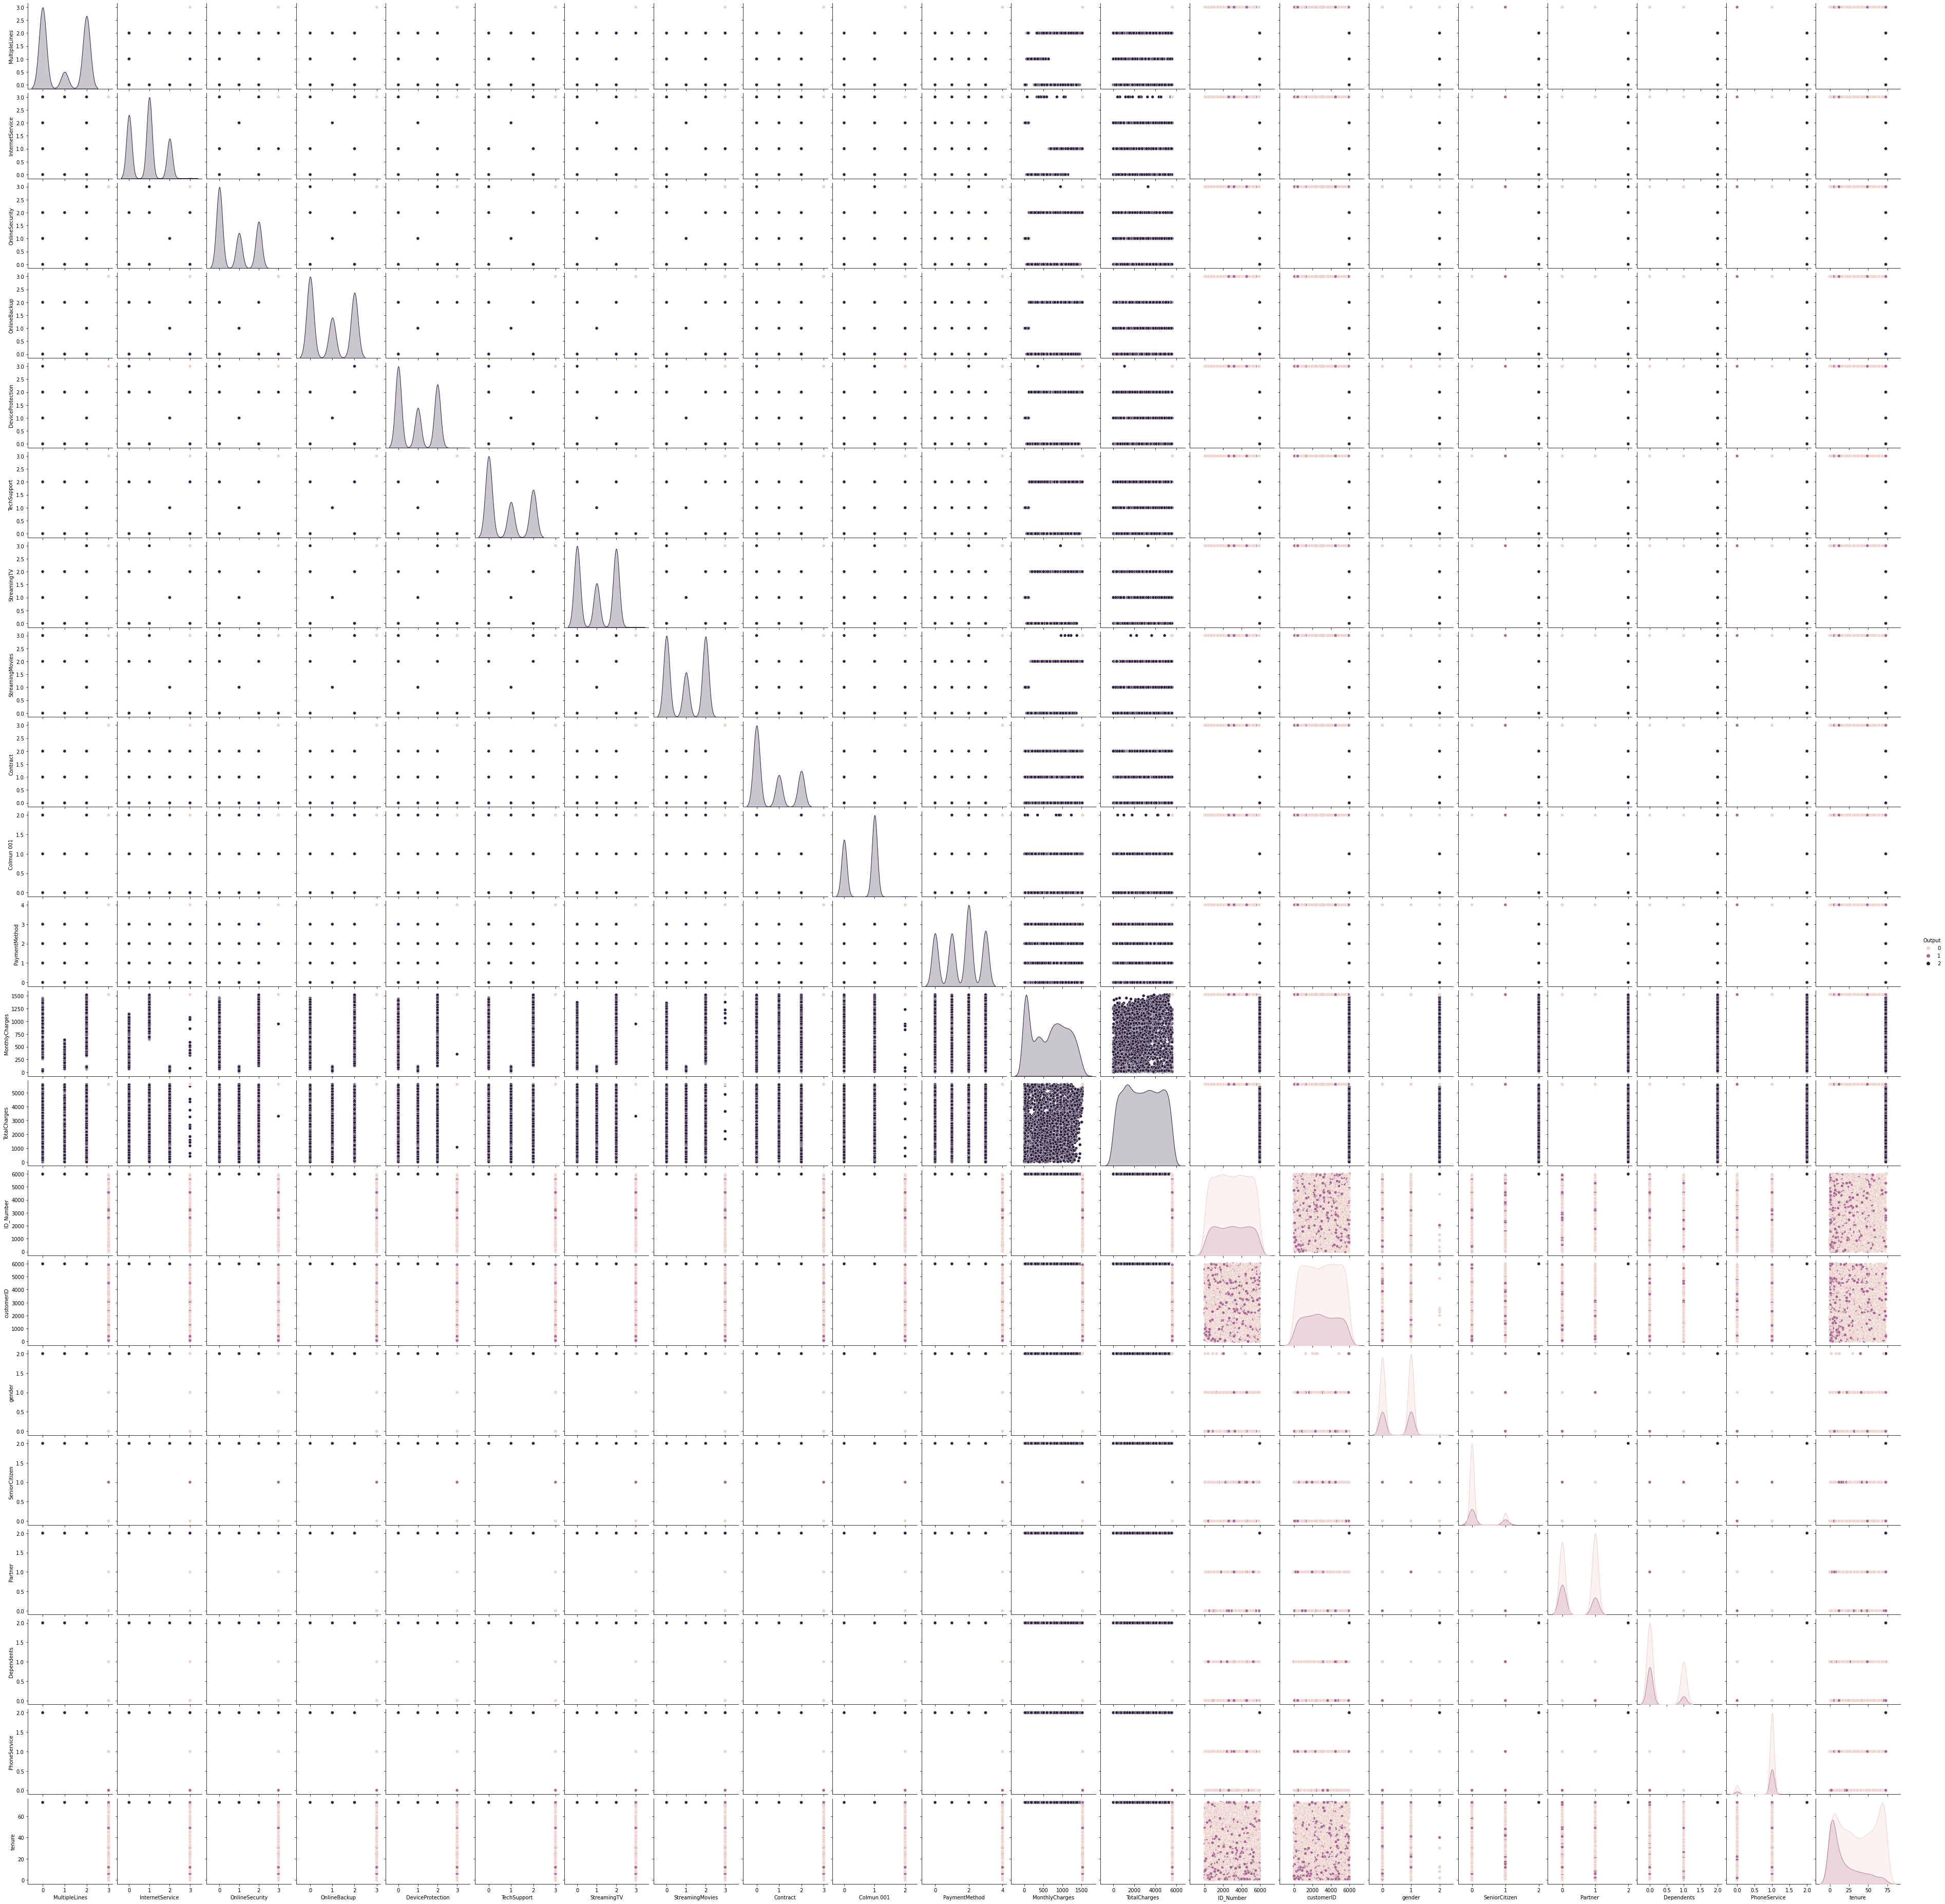

In [ ]:
import seaborn as sns

sns.pairplot(dataFrame,hue='Output')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Output'],
                                                    test_size=0.30, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=33)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [ ]:
knnmodel.score(X_test, y_test)

0.8644209354120267

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = LogReg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1338
           1       0.60      0.18      0.28       505
           2       1.00      1.00      1.00      1749

    accuracy                           0.87      3592
   macro avg       0.78      0.71      0.71      3592
weighted avg       0.85      0.87      0.84      3592



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfmodel.score(X_test, y_test)

0.8624721603563474

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.871
Accuracy score (validation): 0.859
Learning rate:  0.075
Accuracy score (training): 0.871
Accuracy score (validation): 0.859
Learning rate:  0.1
Accuracy score (training): 0.871
Accuracy score (validation): 0.859
Learning rate:  0.25
Accuracy score (training): 0.883
Accuracy score (validation): 0.873
Learning rate:  0.5
Accuracy score (training): 0.888
Accuracy score (validation): 0.871
Learning rate:  0.75
Accuracy score (training): 0.886
Accuracy score (validation): 0.869
Learning rate:  1
Accuracy score (training): 0.888
Accuracy score (validation): 0.873
